In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sarin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading the dataset
data = pd.read_csv("credit_customers.csv")

In [3]:
# Displaying the dataset
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


# Null Value handling

In [4]:
# Checking for null values
data.isnull().sum()       #shows no NULL values but null = none

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [5]:
# Displaying information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

# Handling 'none' values

In [6]:
# Identifying columns with 'none' values
null_columns =[]
for column in data.columns:
    if sum(data[column]== 'none')>0:
        null_columns.append(column)
        print('columns ',"= ",sum(data[column]== 'none'))

columns  =  907
columns  =  814
columns  =  596


In [7]:
# Dropping columns with 'none' values
data.drop(null_columns,axis = 1, inplace = True)

# Data Preprocessing

In [8]:
# Encoding categorical columns using LabelEncoder and OneHotEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
# Encoding 'class' column using LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [10]:
# Encoding 'foreign_worker' column using LabelEncoder
data['foreign_worker'] = le.fit_transform(data['foreign_worker'])

In [11]:
# Encoding 'job' column using OneHotEncoder
ohe = OneHotEncoder()
ohe.fit([['high qualif/self emp/mgmt'],
 ['skilled'],
 ['unemp/unskilled non res'],
 ['unskilled resident']])
mat = ohe.fit_transform(np.array(data['job']).reshape(-1,1))
data[['high qualif/self emp/mgmt','skilled','unemp/unskilled non res','unskilled resident']] = mat.toarray()
data.drop('job', axis = 1, inplace = True)

In [12]:
# Encoding 'housing' column using OneHotEncoder
ohe.fit([['for free',],
 ['own'],
 ['rent']])
mat = ohe.fit_transform(np.array(data['housing']).reshape(-1,1))
data[['for free', 'own', 'rent']] = mat.toarray()
data.drop('housing', axis = 1, inplace = True)

In [13]:
# Encoding 'employment' column using OneHotEncoder
ohe.fit([['1<=X<4'],
 ['4<=X<7'],
 ['<1'],
 ['unemployed']])
mat = ohe.fit_transform(np.array(data['employment']).reshape(-1,1))
data[['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed']] = mat.toarray()
data.drop('employment', axis = 1, inplace = True)

In [14]:
# Encoding 'savings_status' column using OneHotEncoder
ohe.fit([['100<=X<500'],['500<=X<1000'],['<100'],['>=1000'],['no known savings']])
mat = ohe.fit_transform(np.array(data['savings_status']).reshape(-1,1))
data[['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings']] = mat.toarray()
data.drop('savings_status', axis = 1, inplace = True)

In [15]:
# Encoding 'property_magnitude' column using OneHotEncoder
ohe.fit([['car'],['life insurance'],['no known property'],['real estate']])
mat = ohe.fit_transform(np.array(data['property_magnitude']).reshape(-1,1))
data[['car', 'life insurance', 'no known property', 'real estate']] = mat.toarray()
data.drop('property_magnitude', axis = 1, inplace = True)

In [16]:
# Encoding 'purpose' column using LabelEncoder
data['purpose'] = le.fit_transform(data['purpose'])

In [17]:
# Encoding 'credit_history' column using OneHotEncoder
ohe.fit([['all paid'],['critical/other existing credit'],['delayed previously'],['existing paid'],['no credits/all paid']])
mat = ohe.fit_transform(np.array(data['credit_history']).reshape(-1,1))
data[['all paid', 'critical/other existing credit', 'delayed previously', 'existing paid', 'no credits/all paid']] = mat.toarray()
data.drop('credit_history', axis = 1, inplace = True)

In [18]:
# Encoding 'checking_status' column using OneHotEncoder
ohe.fit([['0<=X<200'],['<0'],['>=200'],['no checking']])
mat = ohe.fit_transform(np.array(data['checking_status']).reshape(-1,1))
data[['0<=X<200', '<0', '>=200', 'no checking']] = mat.toarray()
data.drop('checking_status', axis = 1, inplace = True)

In [19]:
data['personal_status'] = le.fit_transform(data['personal_status'])

In [20]:
# Displaying information about the modified dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration                        1000 non-null   int64  
 1   purpose                         1000 non-null   int32  
 2   credit_amount                   1000 non-null   int64  
 3   installment_commitment          1000 non-null   int64  
 4   personal_status                 1000 non-null   int32  
 5   residence_since                 1000 non-null   int64  
 6   age                             1000 non-null   int64  
 7   existing_credits                1000 non-null   int64  
 8   num_dependents                  1000 non-null   int64  
 9   foreign_worker                  1000 non-null   int32  
 10  class                           1000 non-null   int32  
 11  high qualif/self emp/mgmt       1000 non-null   float64
 12  skilled                         100

In [21]:
data.head()

,duration,purpose,credit_amount,installment_commitment,personal_status,residence_since,age,existing_credits,num_dependents,foreign_worker,...,real estate,all paid,critical/other existing credit,delayed previously,existing paid,no credits/all paid,0<=X<200,<0,>=200,no checking
0,6,6,1169,4,3,4,67,2,1,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,6,5951,2,0,2,22,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,12,2,2096,2,3,3,49,1,2,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,42,3,7882,2,3,4,45,1,2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24,4,4870,3,3,4,53,2,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Splitting the dataset into features and target variable
X = data.drop('class',axis =1)
y = data['class']

In [23]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2)

In [24]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(xtrain,ytrain)

C:\Users\Sarin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Making predictions
ypred = log_reg.predict(xtest)

# Evaluating the model

In [26]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ypred, ytest)
print("Accuracy score:", accuracy)

Accuracy score: 0.705


In [27]:
# Calculating r2 score
from sklearn.metrics import r2_score
accuracy2 = r2_score(ypred,ytest)
print("r2 score:", accuracy2)

r2 score: -0.9565577847786435


In [28]:
# Generating confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(ytest, ypred)

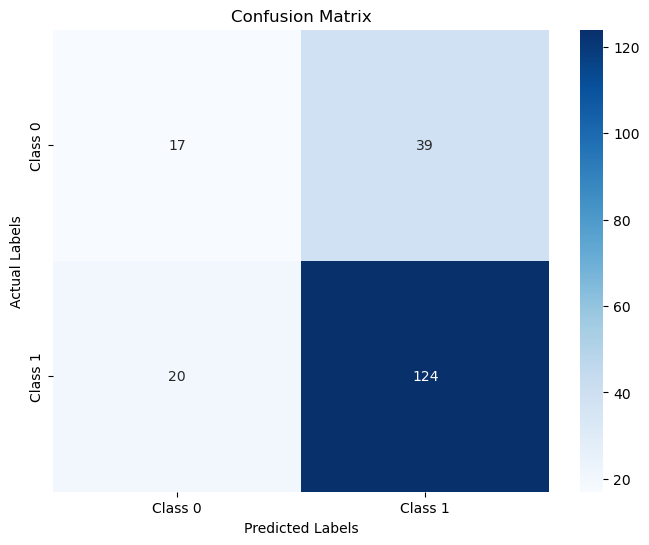

In [29]:
# Plotting confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Calculating precision, recall, f1-score, and ROC-AUC score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
roc_auc = roc_auc_score(ytest, ypred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Precision: 0.7607361963190185
Recall: 0.8611111111111112
F1-score: 0.8078175895765473
ROC-AUC score: 0.5823412698412699
